In [1]:
import pandas as pd

chunks = []
for chunk in pd.read_csv("pns2019.csv", chunksize=10000):
    chunks.append(chunk)

base = pd.concat(chunks)
display(base)

V0001    V0024    UPA_PNS  V0006_PNS  V0015  V0020  V0022  V0026  \
0          11  1110011  110000016          1      1   2019    6.0      1   
1          11  1110011  110000016          1      1   2019    6.0      1   
2          11  1110011  110000016          1      1   2019    6.0      1   
3          11  1110011  110000016          1      1   2019    6.0      1   
4          11  1110011  110000016          1      1   2019    6.0      1   
...       ...      ...        ...        ...    ...    ...    ...    ...   
293721     53  5310220  530044434         14      1   2019    4.0      2   
293722     53  5310220  530044434         14      1   2019    4.0      2   
293723     53  5310220  530044434         14      1   2019    4.0      2   
293724     53  5310220  530044434         14      1   2019    4.0      2   
293725     53  5310220  530044434         15      8   2019    NaN      2   

        V0031  V0025A  ...  VDE002  VDE014   VDF002  VDF003  VDF004  VDL001  \
0           1     1.0  ...     1.0     6.0   2098.0   350.0     2.0     NaN   
1           1     0.0  ...     NaN     NaN   2098.0   350.0     2.0     NaN   
2           1     0.0  ...     1.0     4.0   2098.0   350.0     2.0     NaN   
3           1     9.0  ...     NaN     NaN   2098.0   350.0     2.0     NaN   
4           1     9.0  ...     NaN     NaN   2098.0   350.0     2.0     NaN   
...       ...     ...  ...     ...     ...      ...     ...     ...     ...   
293721      1     0.0  ...     1.0     1.0  13390.0  3348.0     6.0     NaN   
293722      1     1.0  ...     NaN     NaN  13390.0  3348.0     6.0     NaN   
293723      1     0.0  ...     1.0     7.0  13390.0  3348.0     6.0     NaN   
293724      1     9.0  ...     NaN     NaN  13390.0  3348.0     6.0     NaN   
293725      1     NaN  ...     NaN     NaN      NaN     NaN     NaN     NaN   

        VDM001  VDP001  VDR001    VDDATA  
0          NaN     NaN     NaN  20210825  
1          NaN     NaN     NaN  20210825  
2          NaN     NaN     NaN  20210825  
3          NaN     NaN     NaN  20210825  
4          NaN     NaN     NaN  20210825  
...        ...     ...     ...       ...  
293721     NaN     NaN     NaN  20210825  
293722     NaN     NaN     NaN  20210825  
293723     NaN     NaN     NaN  20210825  
293724     NaN     NaN     NaN  20210825  
293725     NaN     NaN     NaN  20210825  

[293726 rows x 1087 columns]

In [2]:
from module import modules

modules

{'Módulo A - Informações do Domicílio': Module(name='Módulo A - Informações do Domicílio', columns={'A001': Column(name='Tipo do domicílio', old_name='A001', values_dict={'1': 'Casa', '2': 'Apartamento', '3': 'Habitação em casa de cômodos, cortiço ou cabeça de porco', '9': 'Ignorado'}), 'A002010': Column(name='Qual é o material que predomina na construção das paredes externas deste domicílio?', old_name='A002010', values_dict={'1': 'Alvenaria com revestimento ou taipa revestida', '2': 'Alvenaria sem revestimento', '3': 'Taipa sem revestimento', '4': 'Madeira apropriada para construção (aparelhada)', '5': 'Madeira aproveitada', '6': 'Outro material', '9': 'Ignorado'}), 'A003010': Column(name='Material predominante na cobertura (telhado) do domicílio', old_name='A003010', values_dict={'1': 'Telha sem laje de concreto', '2': 'Telha com laje de concreto', '3': 'Somente laje de concreto', '4': 'Madeira apropriada para construção (aparelhada)', '5': 'Zinco, alumínio ou chapa metálica', '6': 

In [3]:
violence_df: pd.DataFrame = modules["Módulo V - Violência (Para pessoas de 18 anos ou mais de idade)"].get_module_dataframe(base.loc[:]).drop(["Foi assegurada a privacidade para aplicação desse módulo", "O questionário foi preenchido por:", "Onde foi realizado este atendimento de saúde"], axis=1)
violence_df

Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
0                                                     Não                                                   
1                                                     NaN                                                   
2                                                     NaN                                                   
3                                                     NaN                                                   
4                                                     NaN                                                   
...                                                   ...                                                   
293721                                                NaN                                                   
293722                                                NaN                                                   
293723                                                NaN                                                   
293724                                                NaN                                                   
293725                                                NaN                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
0                                                     Não              
1                                                     NaN              
2                                                     NaN              
3                                                     NaN              
4                                                     NaN              
...                                                   ...              
293721                                                NaN              
293722                                                NaN              
293723                                                NaN              
293724                                                NaN              
293725                                                NaN              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
0                                                     Não                                                                                            
1                                                     NaN                                                                                            
2                                                     NaN                                                                                            
3                                                     NaN                                                                                            
4                                                     NaN                                                                                            
...                                                   ...                                                                                            
293721                                                NaN                                                                                            
293722                                                NaN                                                                                            
293723                                                NaN                                                                                            
293724                                                NaN                                                                                            
293725                                                NaN                                                                                            

       Nos últimos doze meses, a

In [4]:
resident_df = (
    modules["Módulo C - Características gerais dos moradores "]
    .get_module_dataframe(base.loc[:])
    .loc[:, ["Cor ou raça", "Sexo"]]
)

display(resident_df)

Cor ou raça    Sexo
0           Branca  Mulher
1           Parda    Homem
2            Preta   Homem
3            Preta   Homem
4           Parda   Mulher
...            ...     ...
293721       Preta  Mulher
293722      Parda    Homem
293723      Branca   Homem
293724      Parda   Mulher
293725         NaN     NaN

[293726 rows x 2 columns]

In [5]:
violence_df = pd.concat([resident_df, violence_df], axis=1)
display(violence_df)

Cor ou raça    Sexo  \
0           Branca  Mulher   
1           Parda    Homem   
2            Preta   Homem   
3            Preta   Homem   
4           Parda   Mulher   
...            ...     ...   
293721       Preta  Mulher   
293722      Parda    Homem   
293723      Branca   Homem   
293724      Parda   Mulher   
293725         NaN     NaN   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
0                                                     Não                                                   
1                                                     NaN                                                   
2                                                     NaN                                                   
3                                                     NaN                                                   
4                                                     NaN                                                   
...                                                   ...                                                   
293721                                                NaN                                                   
293722                                                NaN                                                   
293723                                                NaN                                                   
293724                                                NaN                                                   
293725                                                NaN                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
0                                                     Não              
1                                                     NaN              
2                                                     NaN              
3                                                     NaN              
4                                                     NaN              
...                                                   ...              
293721                                                NaN              
293722                                                NaN              
293723                                                NaN              
293724                                                NaN              
293725                                                NaN              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
0                                                     Não                                                                                            
1                                                     NaN                                                                                            
2                                                     NaN                                                                                            
3                                                     NaN                                                                                            
4                                                     NaN                                                                                            
...                                                   ...                                                                                            
293721                                                NaN                                                                                            
293722                                                NaN                                                                                            
293723                                                NaN                                                                 

In [6]:
violence_df = violence_df.dropna(subset=["Cor ou raça"])
violence_df = violence_df.drop(index=violence_df[violence_df["Cor ou raça"] == "Ignorado"].index)
display(violence_df)

Cor ou raça    Sexo  \
0           Branca  Mulher   
1           Parda    Homem   
2            Preta   Homem   
3            Preta   Homem   
4           Parda   Mulher   
...            ...     ...   
293720      Branca   Homem   
293721       Preta  Mulher   
293722      Parda    Homem   
293723      Branca   Homem   
293724      Parda   Mulher   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
0                                                     Não                                                   
1                                                     NaN                                                   
2                                                     NaN                                                   
3                                                     NaN                                                   
4                                                     NaN                                                   
...                                                   ...                                                   
293720                                                Não                                                   
293721                                                NaN                                                   
293722                                                NaN                                                   
293723                                                NaN                                                   
293724                                                NaN                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
0                                                     Não              
1                                                     NaN              
2                                                     NaN              
3                                                     NaN              
4                                                     NaN              
...                                                   ...              
293720                                                Não              
293721                                                NaN              
293722                                                NaN              
293723                                                NaN              
293724                                                NaN              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
0                                                     Não                                                                                            
1                                                     NaN                                                                                            
2                                                     NaN                                                                                            
3                                                     NaN                                                                                            
4                                                     NaN                                                                                            
...                                                   ...                                                                                            
293720                                                Não                                                                                            
293721                                                NaN                                                                                            
293722                                                NaN                                                                 

In [7]:
from numpy import nan

violence_df = violence_df[
    violence_df.apply(lambda row: row.isin([nan, "Não"]).sum(), axis=1) != 29
]
violence_df

Cor ou raça    Sexo  \
29          Parda    Homem   
44          Parda    Homem   
51          Branca   Homem   
57          Branca  Mulher   
60          Parda   Mulher   
...            ...     ...   
293693      Parda    Homem   
293694      Branca  Mulher   
293712      Parda    Homem   
293713      Parda   Mulher   
293718      Parda    Homem   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
29                                                    Sim                                                   
44                                                    Não                                                   
51                                                    Não                                                   
57                                                    Não                                                   
60                                                    Não                                                   
...                                                   ...                                                   
293693                                                Sim                                                   
293694                                                Não                                                   
293712                                                Sim                                                   
293713                                                Não                                                   
293718                                                Não                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
29                                                    Sim              
44                                                    Não              
51                                                    Sim              
57                                                    Não              
60                                                    Não              
...                                                   ...              
293693                                                Sim              
293694                                                Sim              
293712                                                Sim              
293713                                                Não              
293718                                                Sim              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
29                                                    Não                                                                                            
44                                                    Sim                                                                                            
51                                                    Não                                                                                            
57                                                    Não                                                                                            
60                                                    Não                                                                                            
...                                                   ...                                                                                            
293693                                                Não                                                                                            
293694                                                Não                                                                                            
293712                                                Não                                                                 

In [8]:
# na_percentage = violence_df.isna().sum() / len(violence_df.index) * 100
# display(na_percentage.sort_values())
# violence_df: pd.DataFrame = violence_df.loc[:, na_percentage[na_percentage < 50].index]
# display(violence_df)

In [9]:
columns_not_filled_with_mode = (
    "V003 Nos últimos doze meses, quantas vezes isso aconteceu com você?",
    "Quem fez isso com você? (Se mais de uma pessoa, defina o pirncipal agressor)",
    "V007 Onde isso ocorreu?",
    "V015 Nos últimos doze meses, quantas vezes isso aconteceu?",
    "V018 Quem fez isso com você",
    "V019 Onde isso ocorreu?",
    "V029 Nos últimos doze meses, quantas vezes isso aconteceu?",
    "V032 Quem fez isso com você",
    " V033 Onde isso ocorreu?",
)

for column in columns_not_filled_with_mode:
    violence_df.loc[:, column] = violence_df[column].fillna("Não sofreu")


for column in violence_df.columns:
    violence_df.loc[:, column] = violence_df[column].fillna(violence_df[column].mode()[0])
violence_df

Cor ou raça    Sexo  \
29          Parda    Homem   
44          Parda    Homem   
51          Branca   Homem   
57          Branca  Mulher   
60          Parda   Mulher   
...            ...     ...   
293693      Parda    Homem   
293694      Branca  Mulher   
293712      Parda    Homem   
293713      Parda   Mulher   
293718      Parda    Homem   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
29                                                    Sim                                                   
44                                                    Não                                                   
51                                                    Não                                                   
57                                                    Não                                                   
60                                                    Não                                                   
...                                                   ...                                                   
293693                                                Sim                                                   
293694                                                Não                                                   
293712                                                Sim                                                   
293713                                                Não                                                   
293718                                                Não                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
29                                                    Sim              
44                                                    Não              
51                                                    Sim              
57                                                    Não              
60                                                    Não              
...                                                   ...              
293693                                                Sim              
293694                                                Sim              
293712                                                Sim              
293713                                                Não              
293718                                                Sim              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
29                                                    Não                                                                                            
44                                                    Sim                                                                                            
51                                                    Não                                                                                            
57                                                    Não                                                                                            
60                                                    Não                                                                                            
...                                                   ...                                                                                            
293693                                                Não                                                                                            
293694                                                Não                                                                                            
293712                                                Não                                                                 

In [10]:
column_groups = [
    {
        "verify_yes": [
            "Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?",
            "Nos últimos doze meses, alguém: Gritou com você ou te xingou?",
            "Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento? ",
            "Nos últimos doze meses, alguém: Te ameaçou de ferir ou machucar alguém importante para você?",
            "Nos últimos doze meses, alguém: Destruiu alguma coisa sua de propósito?",
        ],
        "remove_if_didnt_suffered": [
            "V003 Nos últimos doze meses, quantas vezes isso aconteceu com você?",
            "Quem fez isso com você? (Se mais de uma pessoa, defina o pirncipal agressor)",
            "V007 Onde isso ocorreu?",
        ],
    },
    {
        "verify_yes": [
            "Nos últimos doze meses, alguém: Te deu um tapa ou uma bofetada?",
            "Nos últimos doze meses, alguém: Te empurrou, segurou com força ou jogou algo em você com a intenção de machucar?",
            "Nos últimos doze meses, alguém: Te deu um soco, chutou ou arrastou pelo cabelo?",
            "Nos últimos doze meses, alguém: Tentou ou efetivamente estrangulou, asfixiou ou te queimou de propósito?",
            "Nos últimos doze meses, alguém: Te ameaçou ou feriu com uma faca, arma de fogo ou alguma outra arma ou objeto?",
        ],
        "remove_if_didnt_suffered": [
            "V015 Nos últimos doze meses, quantas vezes isso aconteceu?",
            "V018 Quem fez isso com você",
            "V019 Onde isso ocorreu?",
        ],
    },
    {
        "verify_yes": [
            "Nos últimos doze meses, alguém: tocou, manipulou, beijou ou expôs partes do seu corpo contra sua vontade",
            "Nos últimos doze meses, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?",
            " E alguma vez na vida, alguém: tocou, manipulou, beijou ou expôs partes do seu corpo contra sua vontade",
            "E alguma vez na vida, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?",
        ],
        "remove_if_didnt_suffered": [
            "V029 Nos últimos doze meses, quantas vezes isso aconteceu?",
            "V032 Quem fez isso com você",
            " V033 Onde isso ocorreu?",
        ],
    },
]


def drop_inconsistencies(df: pd.DataFrame, column_groups: list[dict[str, list[str]]]):
    for group in column_groups:
        remove_inconsistencies: pd.DataFrame = df[
            df[group["verify_yes"]].apply(lambda x: (x == "Sim").any(), axis=1)
        ]

        inconsistencies: pd.DataFrame = remove_inconsistencies[
            remove_inconsistencies[group["remove_if_didnt_suffered"]].apply(
                lambda x: (x == "Não sofreu").any(), axis=1
            )
        ]

        if not inconsistencies.empty:
            display(inconsistencies)

        df = df.drop(index=inconsistencies.index)

    return df

cleaned_violence_df = drop_inconsistencies(violence_df, column_groups)

Cor ou raça    Sexo  \
60          Parda   Mulher   
65          Parda   Mulher   
223         Branca   Homem   
228         Parda   Mulher   
316         Branca   Homem   
...            ...     ...   
293580      Parda   Mulher   
293647      Branca  Mulher   
293694      Branca  Mulher   
293712      Parda    Homem   
293713      Parda   Mulher   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
60                                                    Não                                                   
65                                                    Não                                                   
223                                                   Não                                                   
228                                                   Não                                                   
316                                                   Sim                                                   
...                                                   ...                                                   
293580                                                Não                                                   
293647                                                Não                                                   
293694                                                Não                                                   
293712                                                Sim                                                   
293713                                                Não                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
60                                                    Não              
65                                                    Não              
223                                                   Não              
228                                                   Não              
316                                                   Não              
...                                                   ...              
293580                                                Não              
293647                                                Não              
293694                                                Sim              
293712                                                Sim              
293713                                                Não              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
60                                                    Não                                                                                            
65                                                    Não                                                                                            
223                                                   Não                                                                                            
228                                                   Não                                                                                            
316                                                   Não                                                                                            
...                                                   ...                                                                                            
293580                                                Não                                                                                            
293647                                                Não                                                                                            
293694                                                Não                                                                 

In [11]:
cleaned_violence_df

Cor ou raça    Sexo  \
29          Parda    Homem   
44          Parda    Homem   
51          Branca   Homem   
57          Branca  Mulher   
127         Parda    Homem   
...            ...     ...   
293644      Branca  Mulher   
293646      Parda    Homem   
293690      Branca   Homem   
293693      Parda    Homem   
293718      Parda    Homem   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
29                                                    Sim                                                   
44                                                    Não                                                   
51                                                    Não                                                   
57                                                    Não                                                   
127                                                   Não                                                   
...                                                   ...                                                   
293644                                                Sim                                                   
293646                                                Não                                                   
293690                                                Não                                                   
293693                                                Sim                                                   
293718                                                Não                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
29                                                    Sim              
44                                                    Não              
51                                                    Sim              
57                                                    Não              
127                                                   Não              
...                                                   ...              
293644                                                Sim              
293646                                                Sim              
293690                                                Sim              
293693                                                Sim              
293718                                                Sim              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
29                                                    Não                                                                                            
44                                                    Sim                                                                                            
51                                                    Não                                                                                            
57                                                    Não                                                                                            
127                                                   Não                                                                                            
...                                                   ...                                                                                            
293644                                                Não                                                                                            
293646                                                Não                                                                                            
293690                                                Não                                                                 

In [12]:
categorical_columns = [
    "V003 Nos últimos doze meses, quantas vezes isso aconteceu com você?",
    "V015 Nos últimos doze meses, quantas vezes isso aconteceu?",
    "V029 Nos últimos doze meses, quantas vezes isso aconteceu?",
]
order = ["Não sofreu", "Uma vez", "Algumas vezes", "Muitas vezes"]

for column in categorical_columns:  
    cleaned_violence_df[column] = pd.Categorical(
        cleaned_violence_df[column], categories=order, ordered=True
    )
    cleaned_violence_df[column] = cleaned_violence_df[column].cat.codes

cleaned_violence_df

Cor ou raça    Sexo  \
29          Parda    Homem   
44          Parda    Homem   
51          Branca   Homem   
57          Branca  Mulher   
127         Parda    Homem   
...            ...     ...   
293644      Branca  Mulher   
293646      Parda    Homem   
293690      Branca   Homem   
293693      Parda    Homem   
293718      Parda    Homem   

       Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?  \
29                                                    Sim                                                   
44                                                    Não                                                   
51                                                    Não                                                   
57                                                    Não                                                   
127                                                   Não                                                   
...                                                   ...                                                   
293644                                                Sim                                                   
293646                                                Não                                                   
293690                                                Não                                                   
293693                                                Sim                                                   
293718                                                Não                                                   

       Nos últimos doze meses, alguém: Gritou com você ou te xingou?  \
29                                                    Sim              
44                                                    Não              
51                                                    Sim              
57                                                    Não              
127                                                   Não              
...                                                   ...              
293644                                                Sim              
293646                                                Sim              
293690                                                Sim              
293693                                                Sim              
293718                                                Sim              

       Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?   \
29                                                    Não                                                                                            
44                                                    Sim                                                                                            
51                                                    Não                                                                                            
57                                                    Não                                                                                            
127                                                   Não                                                                                            
...                                                   ...                                                                                            
293644                                                Não                                                                                            
293646                                                Não                                                                                            
293690                                                Não                                                                 

In [13]:
violence_df_encoded = pd.get_dummies(cleaned_violence_df, columns=[column for column in cleaned_violence_df.columns if column not in categorical_columns and column != "Cor ou raça"])

violence_df_encoded

Cor ou raça  \
29          Parda    
44          Parda    
51          Branca   
57          Branca   
127         Parda    
...            ...   
293644      Branca   
293646      Parda    
293690      Branca   
293693      Parda    
293718      Parda    

        V003 Nos últimos doze meses, quantas vezes isso aconteceu com você?  \
29                                                      3                     
44                                                      2                     
51                                                      1                     
57                                                      0                     
127                                                     2                     
...                                                   ...                     
293644                                                  3                     
293646                                                  2                     
293690                                                  3                     
293693                                                  3                     
293718                                                  2                     

        V015 Nos últimos doze meses, quantas vezes isso aconteceu?  \
29                                                      0            
44                                                      0            
51                                                      1            
57                                                      1            
127                                                     1            
...                                                   ...            
293644                                                  0            
293646                                                  0            
293690                                                  0            
293693                                                  0            
293718                                                  0            

        V029 Nos últimos doze meses, quantas vezes isso aconteceu?  \
29                                                      3            
44                                                      0            
51                                                      0            
57                                                      0            
127                                                     0            
...                                                   ...            
293644                                                  0            
293646                                                  0            
293690                                                  0            
293693                                                  0            
293718                                                  0            

        Sexo_Homem  Sexo_Mulher  \
29            True        False   
44            True        False   
51            True        False   
57           False         True   
127           True        False   
...            ...          ...   
293644       False         True   
293646        True        False   
293690        True        False   
293693        True        False   
293718        True        False   

        Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?_Não  \
29                                                  False                                                        
44                                                   True                                                        
51                                                   True                                                        
57                                                   True                                                        
127                                                  True                                                        
...   

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


target_column = "Cor ou raça"
X = violence_df_encoded.drop(target_column, axis=1)
y = violence_df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}


model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_tree = grid_search.best_estimator_

plt.figure(figsize=(500,125))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=y.unique().astype(str),
    filled=True,
    rounded=True,
    fontsize=24,
    proportion=True,
)
plt.show()

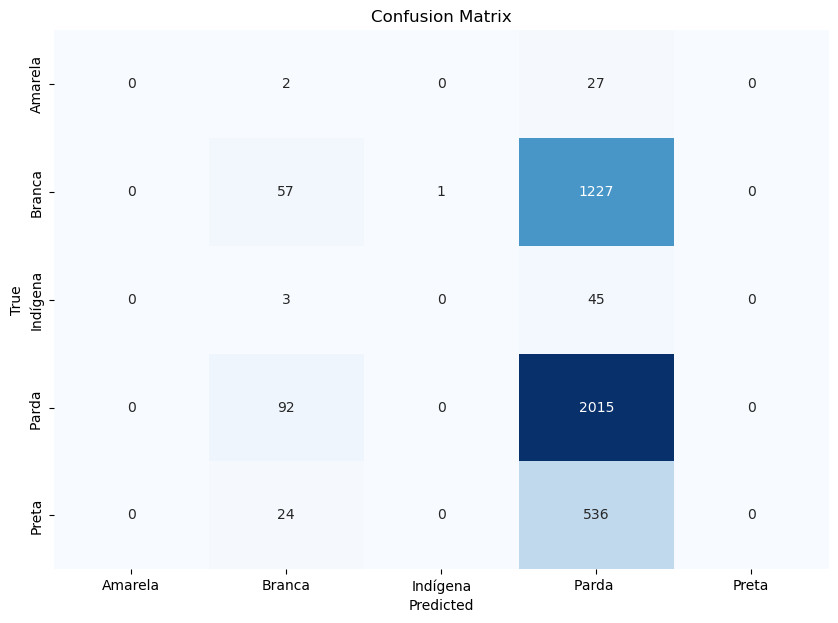

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = best_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=best_tree.classes_,
    yticklabels=best_tree.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [17]:
print(grid_search.score(X_test, y_test))

0.514271531397369
